In [2]:
from LE import LE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

# MNIST

In [3]:
digits = datasets.load_digits(n_class=10)
data = digits.data
labels = digits.target

In [4]:
le_digits = LE(data, eps = 33, dim = 3, graph = 'eps', weights = 'heat kernel', 
               sigma = 5, laplacian = 'symmetrized', opt_eps_jumps = 1.2)
Y_digits = le_digits.transform()

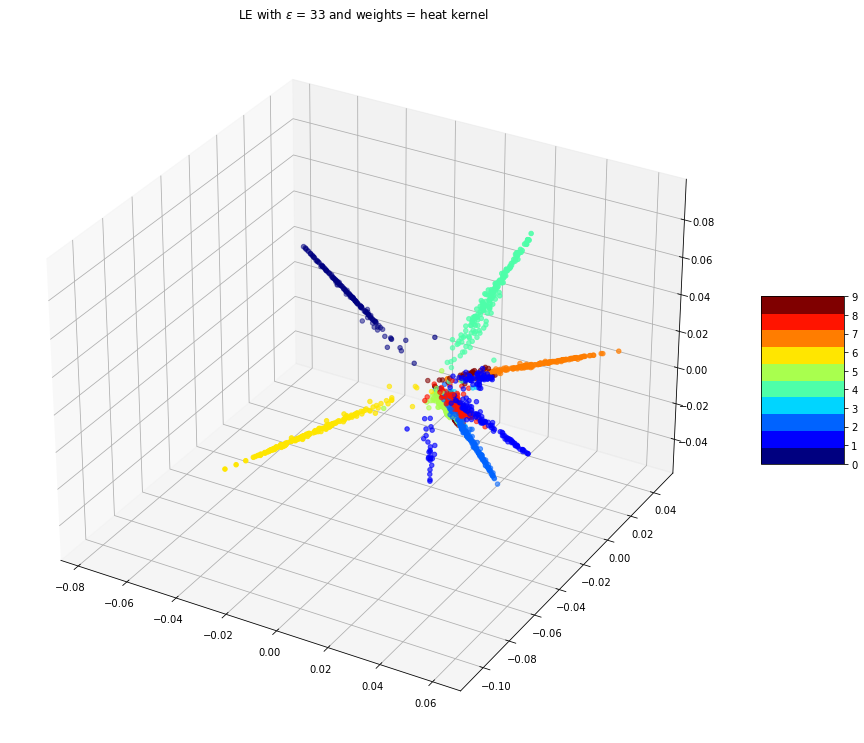

In [5]:
fig = plt.figure(figsize = (15,18))
ax = fig.add_subplot(111, projection='3d')
ax3d = ax.scatter(Y_digits[:, 0], Y_digits[:, 1], Y_digits[:, 2], c=labels,cmap=plt.cm.get_cmap('jet', 10))
fig.colorbar(ax3d, ticks=range(10), aspect = 2, fraction = 0.1)
plt.title('LE with $\epsilon$ = {} and weights = {}'.format(le_digits.eps, le_digits.weights))
plt.show()

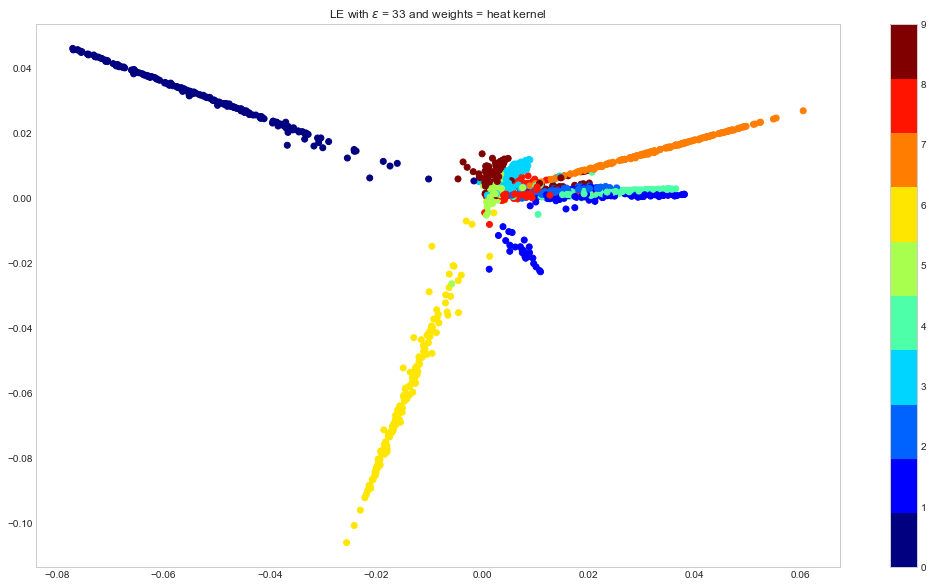

In [8]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (18, 10))
plt.scatter(Y_digits[:, 0], Y_digits[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.title('LE with $\epsilon$ = {} and weights = {}'.format(le_digits.eps, le_digits.weights))
plt.grid(False)

<br>

# Swiss Roll

In [9]:
X, color = datasets.samples_generator.make_swiss_roll(n_samples=2000, random_state = 2456)

Text(0.5, 0, 'Z Label')

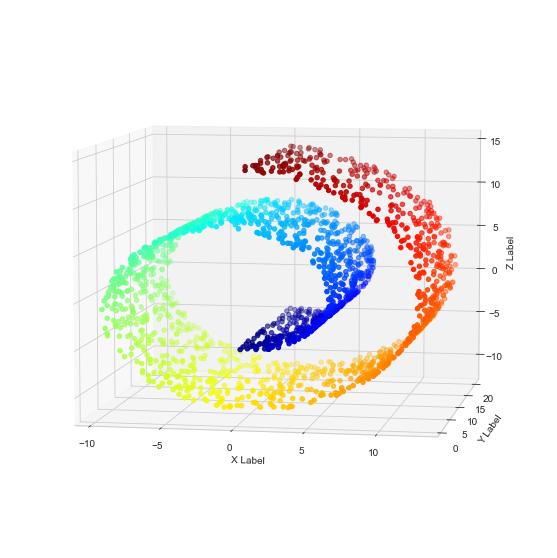

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

### Laplacian Eigenmaps

In [11]:
le = LE(X, dim = 3, eps = 1.97, graph = 'eps', weights = 'heat kernel', 
        sigma = 5, laplacian = 'symmetrized')

In [12]:
Y_t = le.transform()

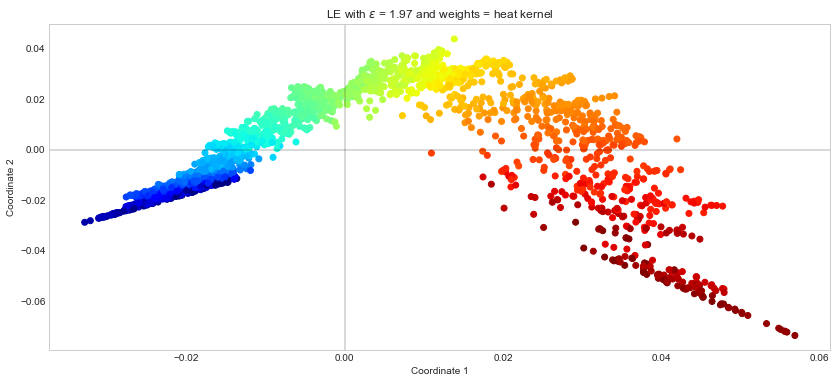

In [13]:
le.plot_embedding_2d(color, cmap=plt.cm.jet, grid = False, size = (14, 6))

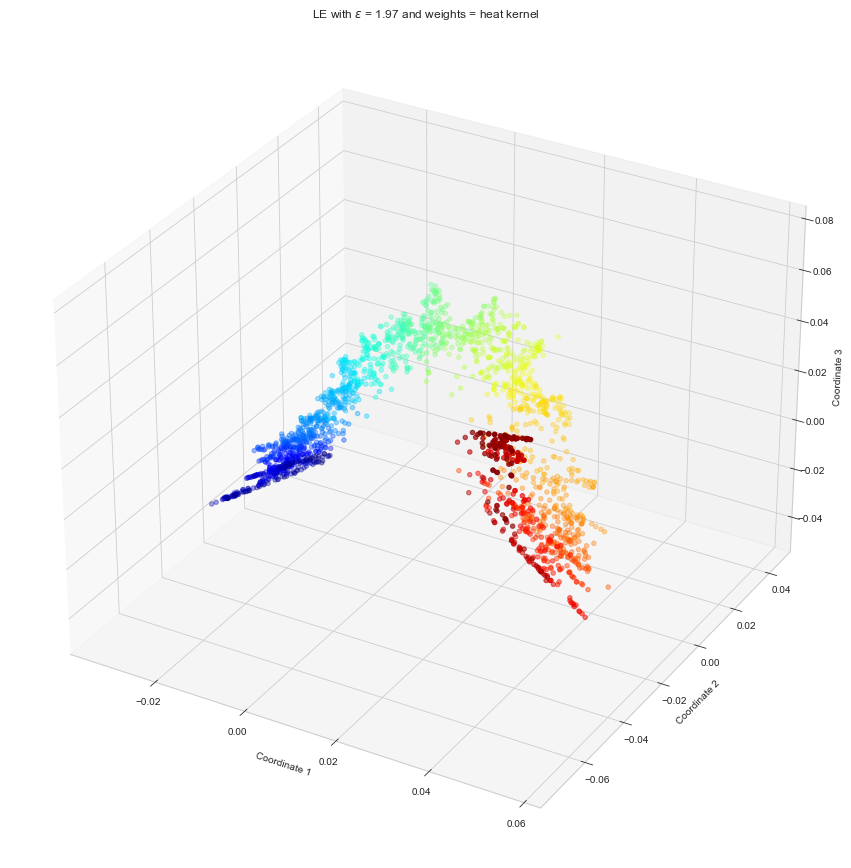

In [14]:
le.plot_embedding_3d(color, cmap=plt.cm.jet, grid = False, size = (15, 18))

<br>

#  Twin peaks dataset

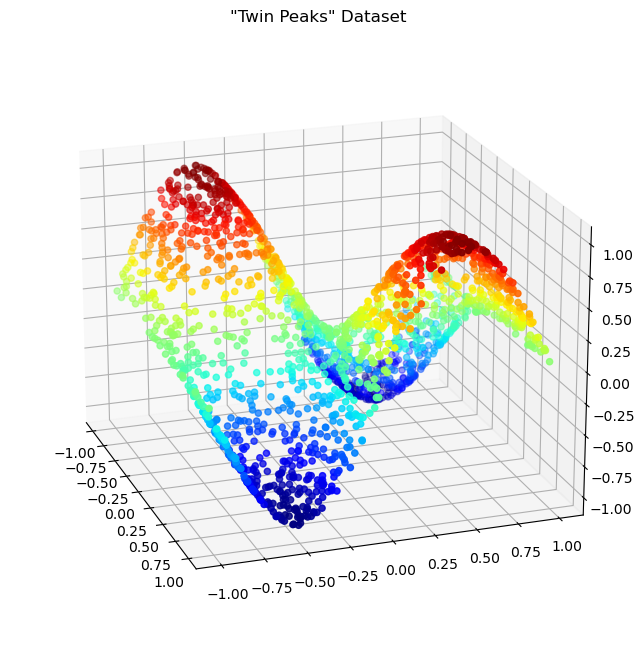

In [15]:
# Dataset taken from Isomap; Drew Wilimitis
# https://github.com/drewwilimitis/Manifold-Learning
plt.style.use('default')
n = 2000
param = 1
xy = 1 - 2 * np.random.rand(2, n)
p = np.array([xy[1, :], xy[0, :], param * np.sin(np.pi * xy[0, :]) * np.tanh(3 * xy[1, :])]).T
color = p[:, 2]
fig = plt.figure(figsize = (9, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p[:, 0], p[:, 1], p[:, 2], c=color, cmap=plt.cm.jet)
plt.title('"Twin Peaks" Dataset', size=12)
ax.view_init(20, -19);

### Laplacian Eigenmaps

In [18]:
le2 = LE(p, dim = 3, eps = 0.32, graph = 'eps', weights = 'heat kernel', 
        sigma = 2, laplacian = 'symmetrized')
_ = le2.transform()

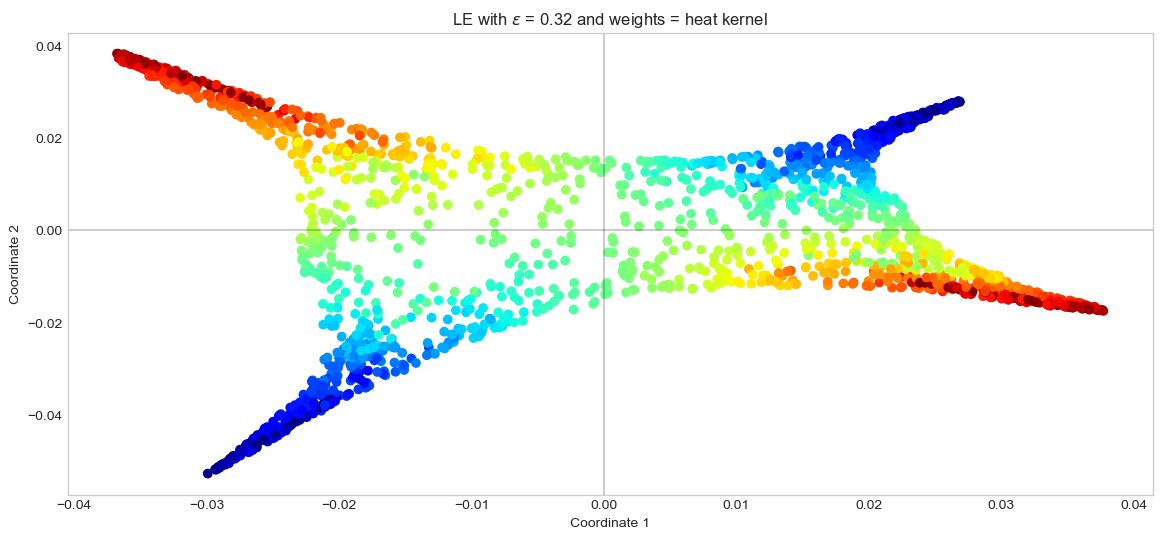

In [19]:
le2.plot_embedding_2d(color, cmap=plt.cm.jet, grid = False, size = (14, 6))

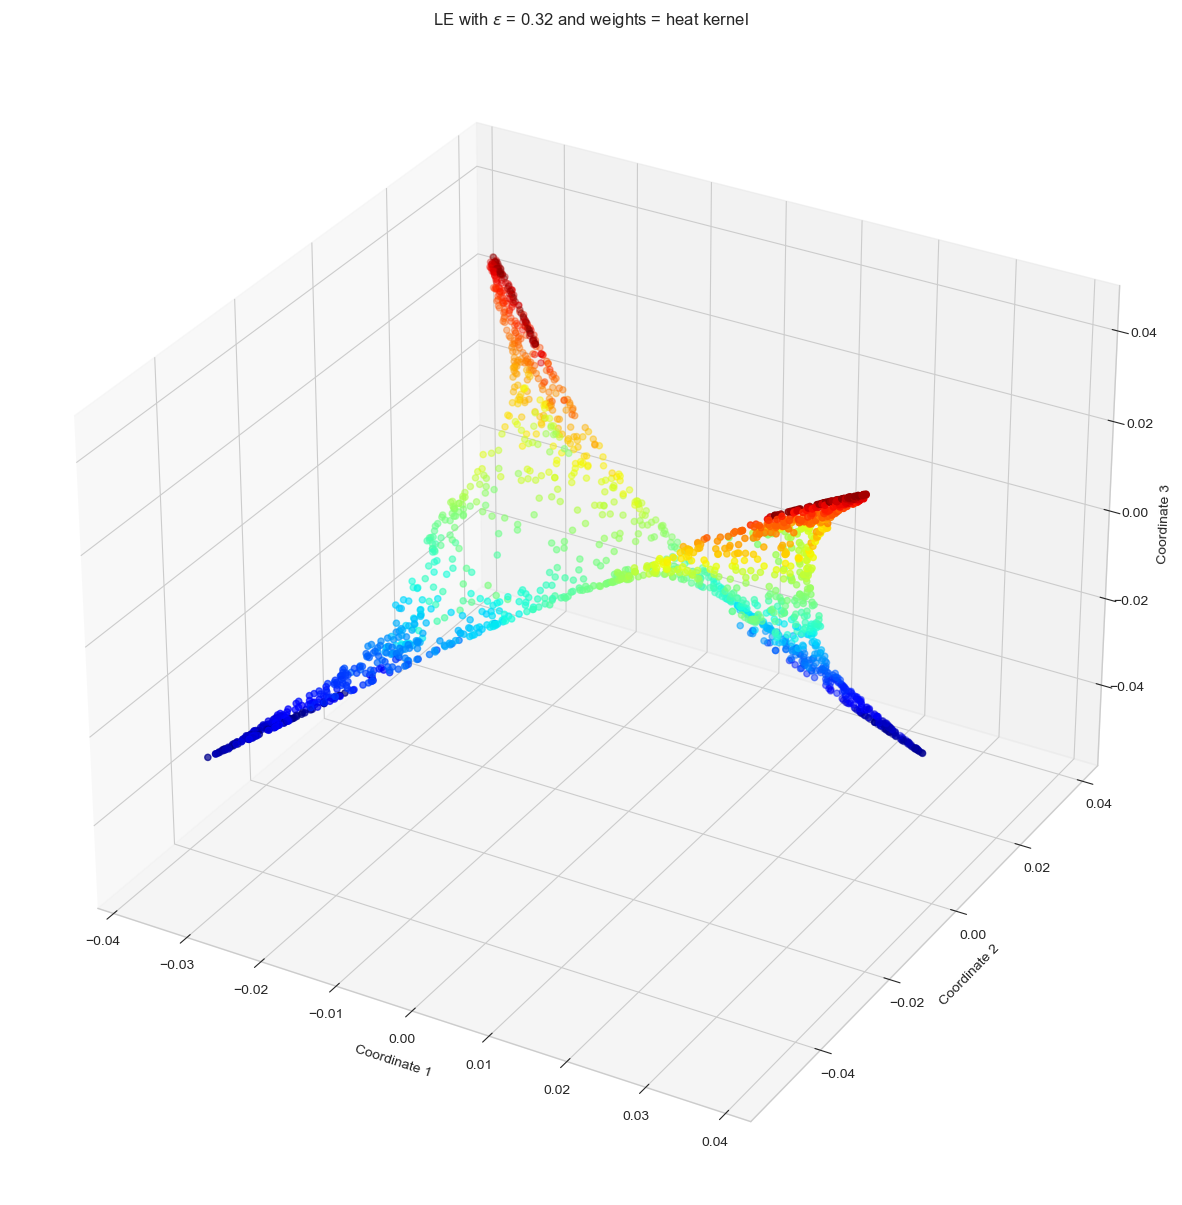

In [20]:
le2.plot_embedding_3d(color, cmap=plt.cm.jet, grid = False, size = (15, 18))